In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import diff, symbols, lambdify, parse_expr, derive_by_array, Matrix
from sympy.vector import gradient
from sympy.plotting import plot
from matplotlib.patches import Rectangle
%matplotlib inline

# Prima Parte

In [2]:
# GLOBAL VAR necessario per Sympy
X = symbols('X')

# Scriviamo la funzione come stringa
func = 'X**3 + 2*X -2*X**2 - 0.25*X**4'

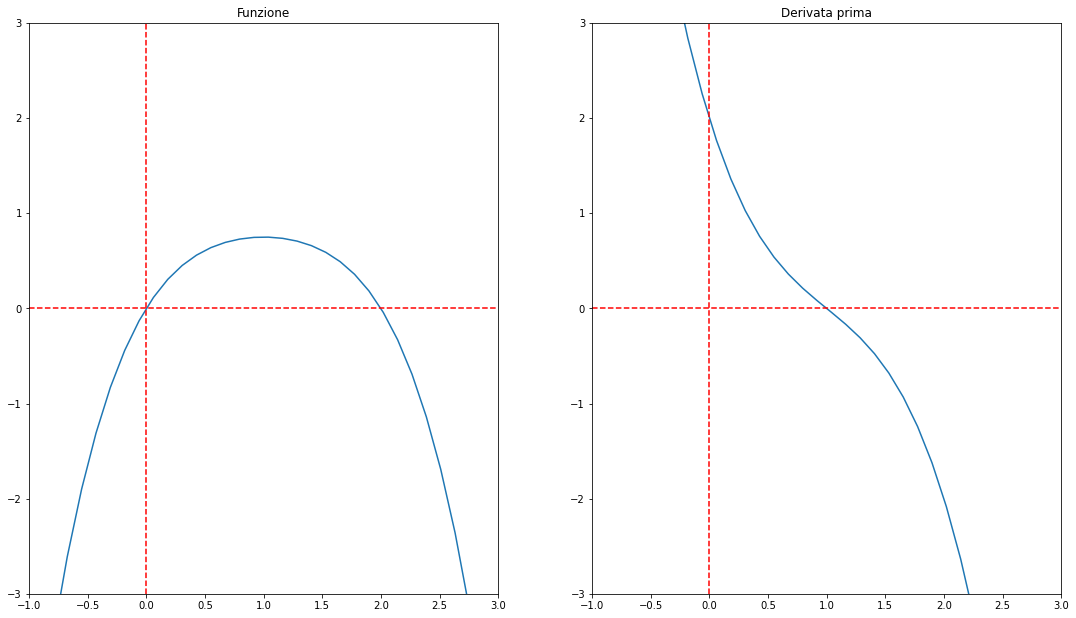

In [3]:
# Plotting funzione e derivata prima
x = np.linspace(-3,3)

y = [i for i in lambdify(X, func)(x)]

fig, ax = plt.subplots(1,2)

ax[0].plot(x, y)
ax[0].set_ylim(-3,3)
ax[0].set_xlim(-1,3)
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].axvline(x=0, color='r', linestyle='--')
ax[0].set_title('Funzione')

y1 = [i for i in lambdify(X, parse_expr(func).diff(X))(x)]
ax[1].plot(x, y1)
ax[1].set_ylim(-3,3)
ax[1].set_xlim(-1,3)
ax[1].axhline(y=0, color='r', linestyle='--')
ax[1].axvline(x=0, color='r', linestyle='--')
ax[1].set_title('Derivata prima')

fig.set_size_inches(18.5, 10.5)


In [4]:
# Plot per analisi della convergenza
def drawConvergence(plotList):
    y = [lambdify(X, func)(i) for i in plotList]
    plt.plot([i for i in range(len(plotList))], y, '-')
    plt.figure(figsize=(18.5,10.5))


In [5]:
# Plot per analisi dell'andamento dell'algoritmo
def drawCurve(plotList, x0, xMax, rectX, rectY, width, length, completaX0, completaXMax):
    _, ax = plt.subplots(1, 2)
    xspace = np.linspace(x0, xMax, 100)
    xspaceCompleta = np.linspace(completaX0, completaXMax, 100)
    y = [lambdify(X, func)(i) for i in xspace]
    ax[1].plot(plotList, [lambdify(X, func)(i) for i in plotList], '-', color='red')
    ax[1].plot(xspace, y, '-', color='blue')
    ax[0].plot(plotList, [lambdify(X, func)(i) for i in plotList], '-', color='red')
    ax[0].plot(xspaceCompleta, lambdify(X, func)(xspaceCompleta), '-', color='blue')
    ax[0].add_patch( Rectangle((rectX,rectY),
                        width, length,
                        fc ='none', 
                        ec ='g',
                        lw = 5) )
    
    fig.set_size_inches(18.5, 10.5)



In [6]:
def bisection(f, a, b, n=1000, tol=1e-10, maximize=False):
    """
    Bisection method for finding roots of a function.
    f: function to find roots of
    n: number of iterations
    tol: tolerance
    """
    if maximize:
        # uso la derivata prima nel caso in cui voglia massimizzare
        f = parse_expr(f)
        f = lambdify(X, f.diff(X))
    else:
        # uso la funzione normale
        f = lambdify(X, f)
      
    plotc = []
    for i in range(n):
        c = (a + b) / 2
        plotc.append(c)
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        if abs(f(c)) < tol:
            break
    return c, f(c), n, plotc

In [7]:
x_star, fx_star, iteration, plotc = bisection(func, -2.5, 2.5, maximize=True)
print('-'*30 +  ' BISECTION METHOD ' + '-'*30)
print("x_star =", x_star)
print("fx_star =", fx_star)
print("iteration =", iteration)
print()

------------------------------ BISECTION METHOD ------------------------------
x_star = 1.0000000000582077
fx_star = -5.820766091346741e-11
iteration = 1000



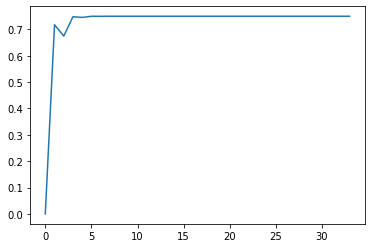

<Figure size 1332x756 with 0 Axes>

In [8]:
# Analisi convergenza per metodo della bisezione
drawConvergence(plotc)

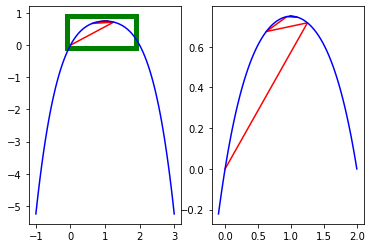

In [9]:
# Analisi dell'andamento algoritmo per metodo della bisezione
drawCurve(plotc, x0=-0.1, xMax=2, rectX=-0.1, rectY=-0.1, width=2, length=1, completaX0=-1, completaXMax=3)

In [10]:
def newton(f, a, tol=1e-10, n=1000, maximize=False):
    """
    Newton's method for finding the root of a function.
    f: function to find root of
    a: initial guess
    tol: tolerance
    n: maximum number of iterations
    """
    if maximize:
        # df = derivata seconda funzione in input
        df = lambdify(X, parse_expr(f).diff(X, X))
        # f = derivata prima funzione in input
        f = lambdify(X, parse_expr(f).diff(X))
    else:
        # df = derivata prima funzione in input
        df = lambdify(X, parse_expr(f).diff(X))
        # f = funzione in input
        f = lambdify(X, parse_expr(f))
    it = a
    plotit = []
    for i in range(n):
        it = it - f(it)/df(it)
        plotit.append(it)
        if abs(f(it)) < tol:
            return it, f(it), plotit
    raise Exception("Maximum number of iterations reached")

In [11]:
x, fx, plotit = newton(func, -2, maximize=True)
print('-'*30 +  ' NEWTON METHOD ' + '-'*30)
print('x =', x)
print('f(x) =', fx)


------------------------------ NEWTON METHOD ------------------------------
x = 0.9999999999999851
f(x) = 1.4876988529977098e-14


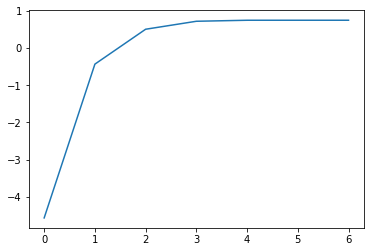

<Figure size 1332x756 with 0 Axes>

In [12]:
# Analisi convergenza per metodo di Newton
drawConvergence(plotit)

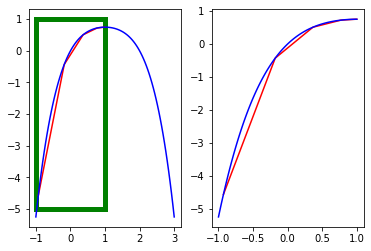

In [13]:
# Analisi dell'andamento algoritmo per metodo di Newton
drawCurve(plotit, x0=-1, xMax=1, rectX=-1, rectY=1, width=2, length=-6, completaX0=-1, completaXMax=3)

In [14]:
def secant(f, x0, x1, tol=1e-6, maxiter=100, maximize=False):
    """
    Secant method for finding roots of a function.
    Input:
        f: function
        x0: initial guess
        x1: initial guess
        tol: tolerance
        maxiter: maximum number of iterations
    Output:
        x: root
        n: number of iterations
    """
    if maximize:
        # f = derivata prima funzione in input
        f = lambdify(X, parse_expr(f).diff(X))
    else:
        # f = funzione in input
        f = lambdify(X, parse_expr(f))
    x = [x0, x1]
    for i in range(maxiter):
        x.append(x[-1] - f(x[-1])*(x[-1] - x[-2])/(f(x[-1]) - f(x[-2])))
        if abs(x[-1] - x[-2]) < tol:
            break
    n = i + 1
    return x, n

In [15]:
x, n = secant(func, -2, 2, maximize=True)
print('-'*30 +  ' NEWTON METHOD ' + '-'*30)
print('x =', x[-1])
print('iterations = ', n)

------------------------------ NEWTON METHOD ------------------------------
x = 1.0000000000008908
iterations =  7


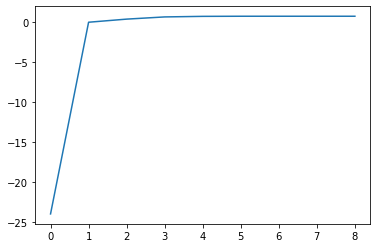

<Figure size 1332x756 with 0 Axes>

In [16]:
# Analisi convergenza per metodo delle secanti
drawConvergence(x)

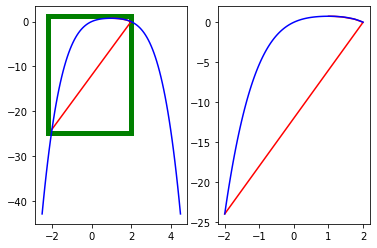

In [17]:
# Analisi dell'andamento algoritmico per metodo delle secanti
drawCurve(x, x0=-2, xMax=2, rectX=-2.2, rectY=1.2, width=4.2, length=-26, completaX0=-2.5, completaXMax=4.5)

# Seconda Parte

In [18]:
# GLOBAL VAR necessario per Sympy
X1 = symbols('X1')
X2 = symbols('X2')

# Scriviamo la funzione come stringa
func = '2*X1*X2 + X2 - X1**2 - 2*X2**2'

Text(0.5, 0, 'X2')

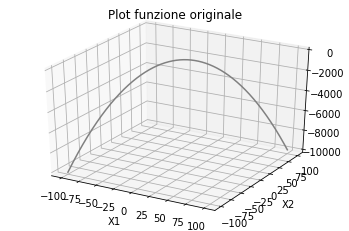

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
z = [i for i in lambdify([X1, X2], func)(x,y)]
ax.plot3D(x, y, z, 'gray')
ax.set_title("Plot funzione originale")
ax.set_xlabel(X1)
ax.set_ylabel(X2)


Text(0.5, 0, 'X2')

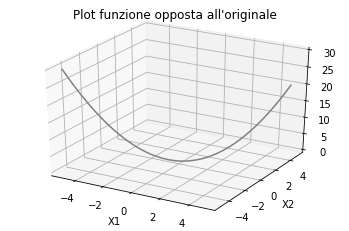

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
z = [i for i in lambdify([X1, X2], parse_expr(func) * -1)(x,y)]
ax.plot3D(x, y, z, 'gray')
ax.set_title("Plot funzione opposta all'originale")
ax.set_xlabel(X1)
ax.set_ylabel(X2)


In [21]:
def gradientDescent(f, x0, alpha=0.01, epsilon=1e-20, maxIter=1000, maximize=False):
    if maximize:
        # Utilizzo l'opposto della funzione in input
        f = parse_expr(f) * -1
    else:
        # Utilizzo la funzione in input
        f = parse_expr(f)
    gradF = lambdify((X1, X2), derive_by_array(f, (X1, X2)))
    vectorHistory = []
    df = gradient(f)
    vector = Matrix(x0) 
    for i in range(maxIter):
        vectorHistory.append(vector)
        gradValue = Matrix(gradF(vector[0], vector[1]))
        vector += -alpha*gradValue
        if gradValue.norm() < epsilon:
            break
    return vectorHistory, lambdify([X1, X2], f)(vector[0], vector[1])

In [22]:
vectorPlot, fit = gradientDescent(func, [6,6], maximize=True)
print('-'*30 +  ' GRADIENT METHOD ' + '-'*30)

print(vectorPlot[-1])
print(fit)

------------------------------ GRADIENT METHOD ------------------------------
Matrix([[0.503032015008318], [0.501873888329541]])
-0.249995221144809


<Figure size 1332x756 with 0 Axes>

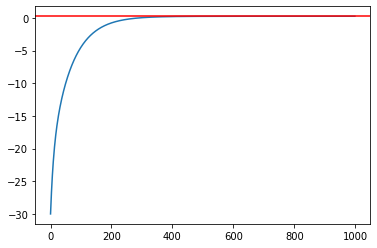

<Figure size 1332x756 with 0 Axes>

In [23]:
# Plot per analisi della convergenza
values = []
for i in range(len(vectorPlot)):
    values.append([vectorPlot[i][0], vectorPlot[i][1]])

yPlot = []
for i in range(len(values)):
    yPlot.append(lambdify([X1, X2], func)(vectorPlot[i][0], vectorPlot[i][1]))

# Linea rossa al valore della convergenza 
plt.plot([i for i in range(len(vectorPlot))], yPlot, '-')
plt.axhline(y=0.25, color='red')
plt.figure(figsize=(18.5,10.5))


In [24]:
# Prendo i valori da VectorPlot, cioè l'elenco di vettori tramite cui la funzione converge e lo spacchetto in due
# vettori x1 e x2 che contengono solamente i valori di x1 il primo e solo i valori di x2 il secondo
values = []
for i in range(len(vectorPlot)):
    values.append([vectorPlot[i][0], vectorPlot[i][1]])

yPlot = []
for i in range(len(values)):
    yPlot.append(lambdify([X1, X2], func)(vectorPlot[i][0], vectorPlot[i][1]))


x1 = []
for x in values:
    x1.append(x[0])

x2 = []
for x in values:
    x2.append(x[1])

Text(0.5, 0, 'X2')

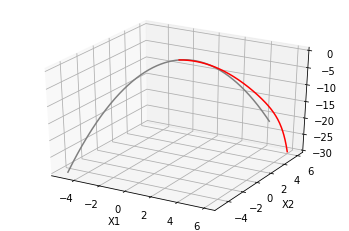

In [25]:
# Analisi della convergenza
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
z = [i for i in lambdify([X1, X2], parse_expr(func))(x,y)]
ax.plot3D(x, y, z, 'gray')
ax.plot3D(x1, x2, yPlot, color='red')

ax.set_xlabel(X1)
ax.set_ylabel(X2)

